In [1]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime as dt #for organizing data by date info
from IPython.core.display import display
from numpy.fft import fft, ifft  #for fft analysis

In [2]:
# Extract Data
energydata = pd.read_csv (r'C:\Users\rajpa\Final_Project\generation.csv')

# Removing the top three rows as they are just additional descriptive headings
energydata = energydata.drop([0,1,2], axis = 0)

In [3]:
energydata.head()

,EntityId,IsOfficial,isProjection,ShortName,Title,PublicationYear,Year,Technology,TechnologySubtype,PublicationUrl,...,FuelNote,GeneralOMNote,HeatRateNote,GeneralCostsNote,GeneralHeatRateEffNote,TechnologyNote,GeneralNote,AvgCapacityFactorNote,OnghtCptlCostDolPerKwNote,Scenario
3,21178,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2027,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21179,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2028,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21180,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2029,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21181,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2030,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21182,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2031,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Size of the data set
print('The size of Energy data set is: ', energydata.shape)

The size of Energy data set is:  (10302, 63)


In [5]:
# Find the columns and their datatypes
energydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10302 entries, 3 to 10304
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EntityId                    10302 non-null  object 
 1   IsOfficial                  10302 non-null  object 
 2   isProjection                10302 non-null  float64
 3   ShortName                   10302 non-null  object 
 4   Title                       10302 non-null  object 
 5   PublicationYear             10302 non-null  object 
 6   Year                        10302 non-null  object 
 7   Technology                  10102 non-null  object 
 8   TechnologySubtype           5005 non-null   object 
 9   PublicationUrl              8641 non-null   object 
 10  Author                      10302 non-null  object 
 11  VariableOMDolPerMwh         6267 non-null   object 
 12  FixedOMDolPerKw             7100 non-null   object 
 13  lcoe                        103

There are 10302 rows for different Energy Generation technologies providing a variety of raw cost and performance numbers (current and future projections) that can be further used to calculated other metrics and analyze using graphs to visualize the differences.

In [6]:
# Finding unique energy generation technologies
energydata['Technology'].unique().tolist()

['Biopower',
 'Geothermal',
 'Photovoltaic',
 'Solar Thermal',
 'Combined Cycle',
 'Combustion Turbine',
 'Hydroelectric',
 'Distributed Generation',
 'Fuel Cell',
 'Coal',
 'Nuclear',
 'Land-Based Wind',
 'Wind-Offshore',
 nan,
 'Storage',
 'Ocean',
 'Small Hydro',
 'Land-based Wind']

In [7]:
# Number of unique energy generation technologies
len(energydata['Technology'].unique().tolist())

18

As it can be seen in the above output that there are about 18 unique energy generation technologies that will be analyzed but one of them is NaN so it will be filtered out when performing analysis and other one is "storage" as it is a storage technology.

In [8]:
# Visualize the subtypes of technologies
energydata['TechnologySubtype'].unique().tolist()

['Biogas',
 nan,
 'Advanced CC CCS',
 'Advanced Combustion Turbine',
 'Advanced CC',
 'Conventional Combustion Turbine',
 'Conventional CC',
 'Conventional',
 'Flash',
 'IGCC',
 'IGCC CCS',
 'Advanced PC',
 'Enhanced Geothermal System',
 'Binary',
 'Battery',
 'Compressed Air',
 'Coal Co-fire',
 'Ice Storage',
 'Pumped Hydro',
 'Advanced PC CCS',
 'Conventional PC',
 'Marine Hydro-Kinetic',
 'Residential',
 'Utility',
 'Tower',
 'Trough',
 'Blind',
 'Fixed Platform',
 'Commercial',
 'Fluidized Bed',
 'Advanced Nuclear',
 'MSW',
 'Diesel',
 'Microturbine',
 'Stoker boiler',
 'Stoker CHP',
 'Gasifier CHP',
 'Digester',
 'Base',
 'Peak',
 'Hydrogen',
 'SMES',
 'Flywheel',
 'Ultracapacitors',
 'residential',
 'conventional CC',
 'Tidal Current',
 'Wave Point',
 'Ocean Current',
 'Small, 10 ft net head',
 'Small, 20 ft net head',
 'Floating Platform']

In [9]:
# New dataframe with all fixes
newdata = energydata.iloc[:,[6,5,7,8,11,12,13,15,16,17,18,19,20,21,29,30,38,39,40,41,43]]
newdata = newdata.dropna(subset = ['Technology'])
newdata.loc[:,'OnghtCptlCostDolPerKw'] = newdata.loc[:,'OnghtCptlCostDolPerKw'].astype(float)
newdata['Technology']=newdata['Technology'].str.capitalize()
newdata.drop(newdata.loc[newdata['Technology']== 'Storage'].index, inplace = True)
newdata.head()

,Year,PublicationYear,Technology,TechnologySubtype,VariableOMDolPerMwh,FixedOMDolPerKw,lcoe,AvgCapacityFactor,MinCapacityFactor,MaxCapacityFactor,...,HeatRate,LifetimeYears,AvailabilityFactor,CapacityMw,InstalledCapacityMW,Leadtimeyears,ThermalEfficiency,StorageEfficiency,Co2MetricTonsPerMwh,DolYear
3,2027,2010,Biopower,Biogas,0.01,114.3,0.0854901,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
4,2028,2010,Biopower,Biogas,0.01,114.3,0.0854901,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
5,2029,2010,Biopower,Biogas,0.01,114.3,0.0854901,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
6,2030,2010,Biopower,Biogas,0.01,114.3,0.0779703,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
7,2031,2010,Biopower,Biogas,0.01,114.3,0.0779703,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007


In [10]:
# Size of the new dataframe
print('The size of new data set is: ', newdata.shape)

The size of new data set is:  (9863, 21)


As it can be seen in the above piece of code the NaN rows in the "Technology" column are dropped.

In [11]:
# Unique Technologies after dropping NaN
newdata['Technology'].unique().tolist()

['Biopower',
 'Geothermal',
 'Photovoltaic',
 'Solar thermal',
 'Combined cycle',
 'Combustion turbine',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Coal',
 'Nuclear',
 'Land-based wind',
 'Wind-offshore',
 'Ocean',
 'Small hydro']

In [12]:
# Number of Unique Technologies after dropping NaN
len(newdata['Technology'].unique().tolist())

15

In [13]:
# Technologies with Overnight Capital Cost values
OCC = newdata.dropna(subset = ['OnghtCptlCostDolPerKw'])
OCC['Technology'].unique().tolist()

['Combined cycle',
 'Combustion turbine',
 'Biopower',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Geothermal',
 'Coal',
 'Nuclear',
 'Photovoltaic',
 'Solar thermal',
 'Land-based wind',
 'Wind-offshore',
 'Ocean',
 'Small hydro']

In [14]:
# Number of technologies with Overnight Capital Cost values
len(newdata['Technology'].unique().tolist())

15

Data manipulation for the Over Night Capital Cost per kW. Importance of OCC is....

In [15]:
# Find means of OCC
OCC.groupby('Technology',as_index=False)['OnghtCptlCostDolPerKw'].mean()

,Technology,OnghtCptlCostDolPerKw
0,Biopower,4772.043647
1,Coal,3049.073978
2,Combined cycle,1260.177002
3,Combustion turbine,715.514056
4,Distributed generation,1540.660619
5,Fuel cell,5649.020406
6,Geothermal,4828.952914
7,Hydroelectric,2567.806679
8,Land-based wind,1704.338659
9,Nuclear,4026.856362


In [16]:
# Find max of OCC
OCC.groupby('Technology',as_index=False)['OnghtCptlCostDolPerKw'].max()

,Technology,OnghtCptlCostDolPerKw
0,Biopower,16312.000000
1,Coal,11000.000000
2,Combined cycle,3800.000000
3,Combustion turbine,2255.000000
4,Distributed generation,9800.000000
5,Fuel cell,10000.000000
6,Geothermal,15752.000000
7,Hydroelectric,11070.000000
8,Land-based wind,5048.499635
9,Nuclear,8375.000000


In [17]:
# Find min of OCC
OCC.groupby('Technology',as_index=False)['OnghtCptlCostDolPerKw'].min()

,Technology,OnghtCptlCostDolPerKw
0,Biopower,140.000000
1,Coal,380.000000
2,Combined cycle,500.000000
3,Combustion turbine,238.390000
4,Distributed generation,500.000000
5,Fuel cell,1500.000000
6,Geothermal,1000.000000
7,Hydroelectric,500.000000
8,Land-based wind,842.831572
9,Nuclear,1600.000000


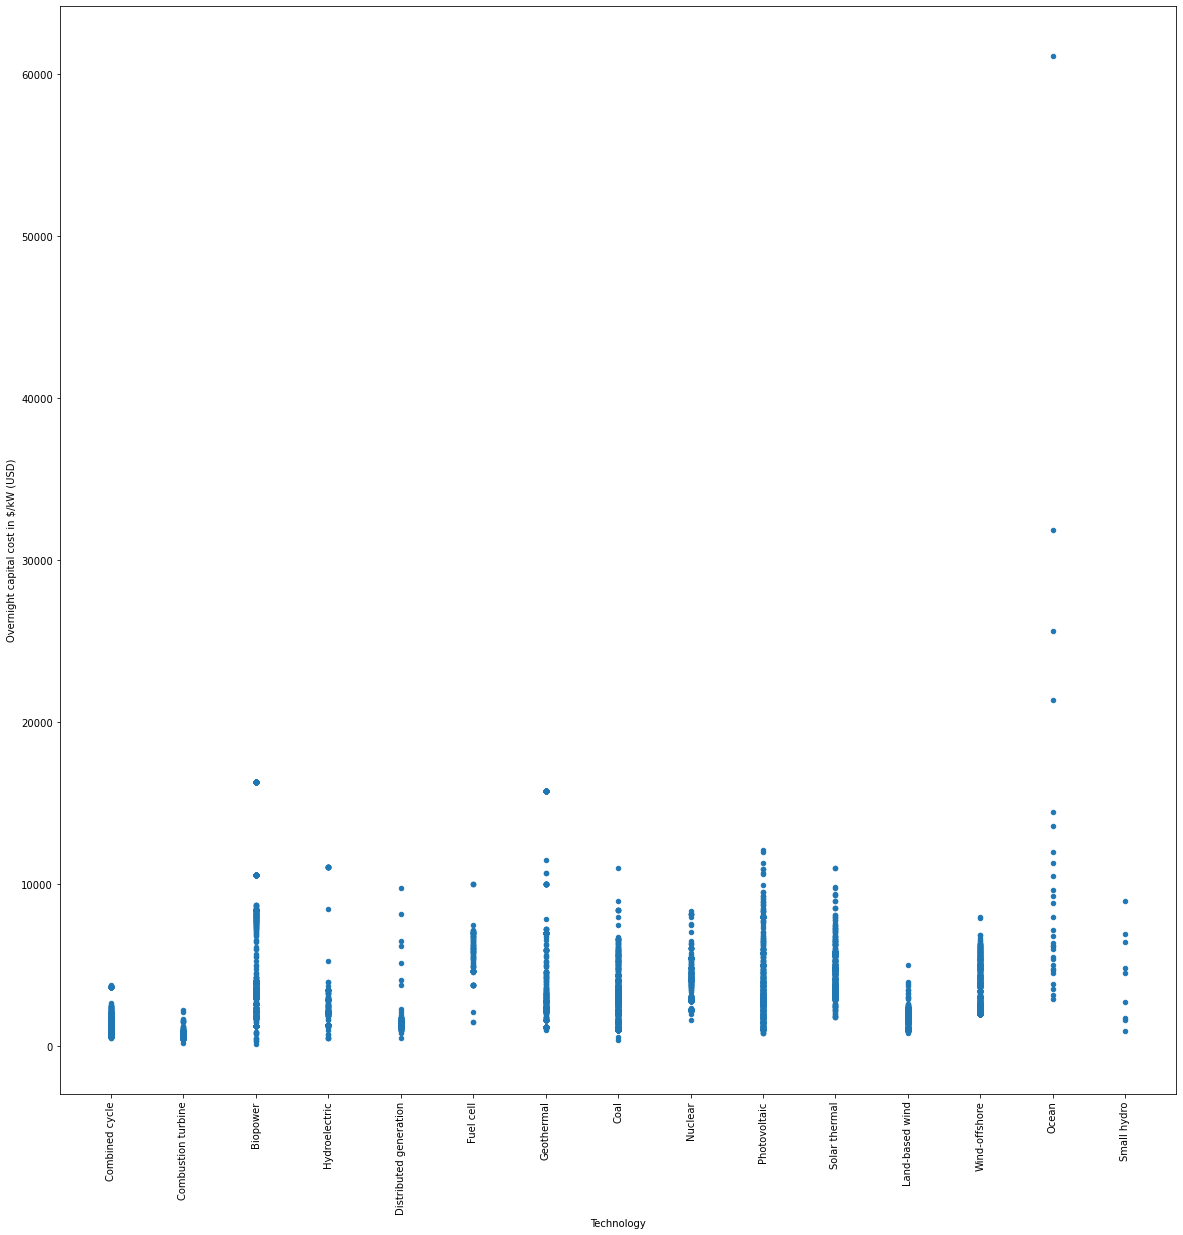

In [25]:
# Scatter Plot
#colors = {'Biopower':'green', 'Hydroelectric':'green','Geothermal':'green','Photovoltaic':'green','Solar thermal':'green', 'Land-based wind':'green','Small hydro':'green','Ocean':'green', 'Wind-offshore':'green'}
sct = OCC.plot.scatter(x='Technology',y='OnghtCptlCostDolPerKw', figsize=(20,20))
sct.set_xlabel("Technology")
sct.set_ylabel("Overnight capital cost in $/kW" + " (" + "USD" + ")")
plt.xticks(rotation=90);

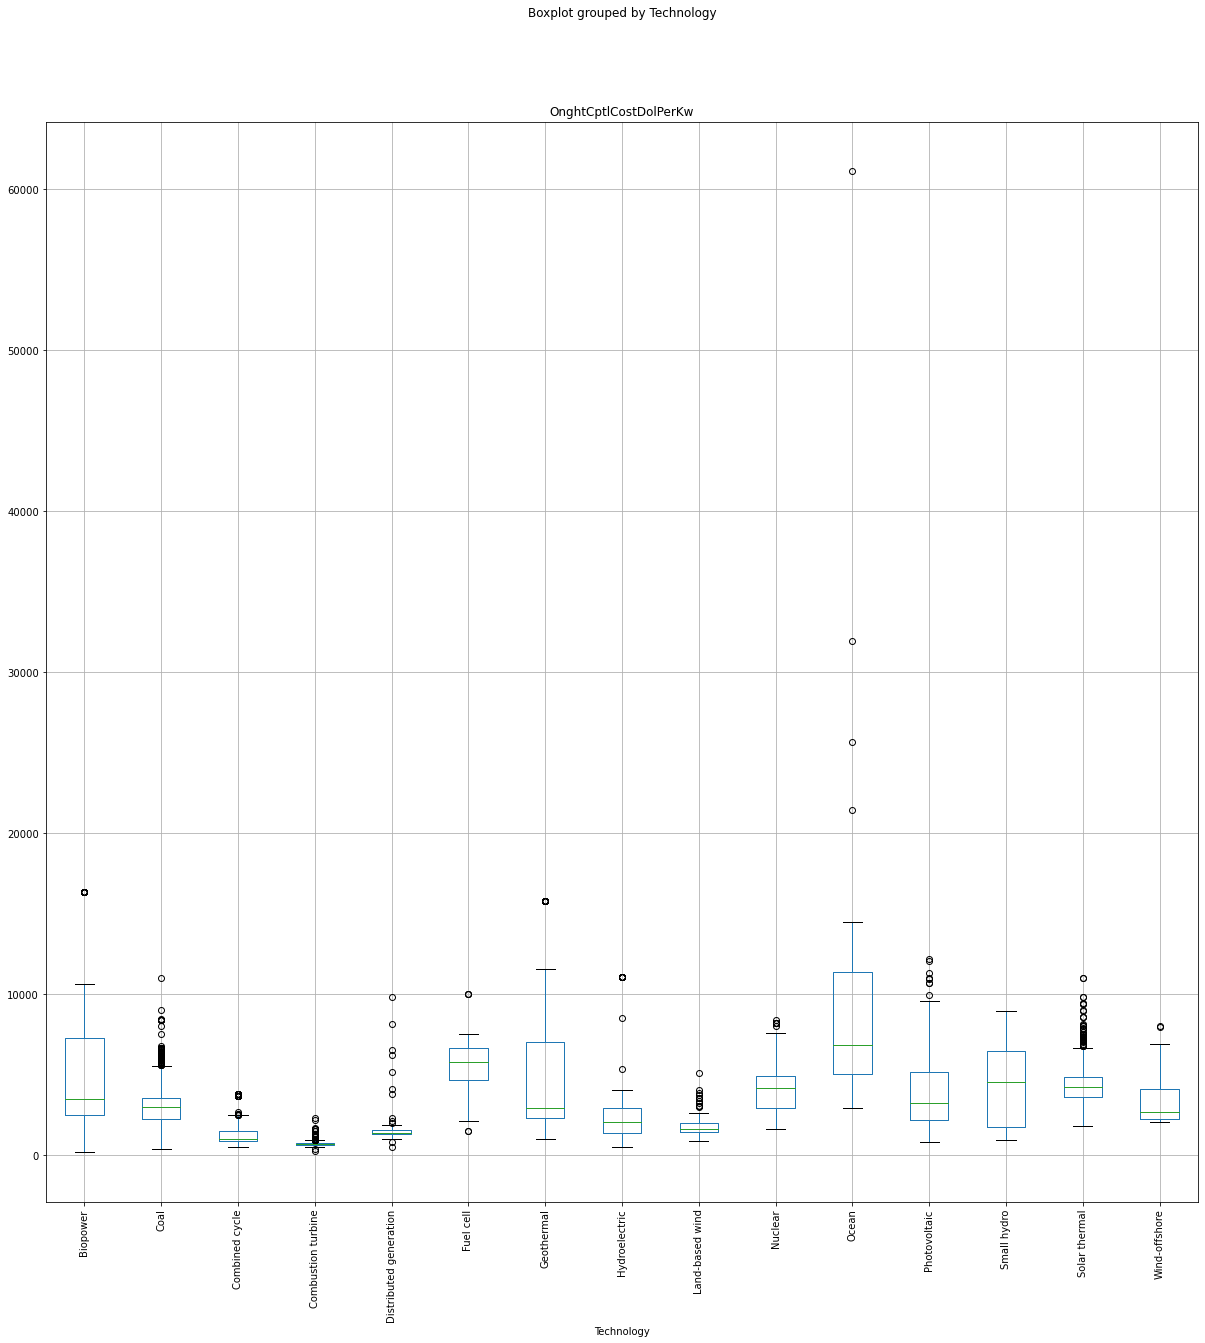

In [23]:

OCC.boxplot(by = 'Technology' , column = ['OnghtCptlCostDolPerKw'], figsize=(20,20))
plt.xticks(rotation=90);

USE QUANTILES TO REMOVE OUTLIERS

In [ ]:
yr_data =  pd.concat([o3_yr, so2_yr, co_yr, no2_yr], axis = 1)
yr_corr = yr_data.corr()
print('Yearly Average Correlation Matrix:')
sn.heatmap(yr_corr, annot=True) #creating a visualization to the correlation
plt.show()

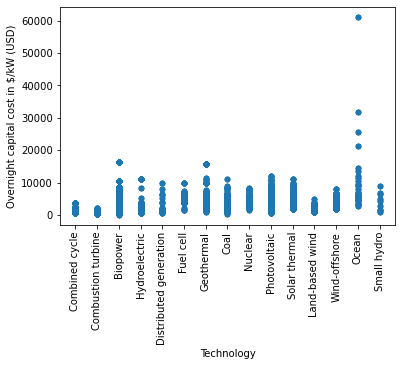

In [20]:
#ax = OCC.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw')
#ax1 = OCC.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw',ax=ax, color = 'green')
#ax2 = OCC.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw',ax=ax)
#ax3 = OCC.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw',ax=ax)
#ax4 = OCC.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw',ax=ax)
#ax5 = OCC.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw',ax=ax)
#ax.set_xlabel("Technology")
#ax.set_ylabel("Overnight capital cost in $/kW" + " (" + "USD" + ")")
#plt.xticks(rotation=90);